## ПР1


#### Подготовил Вадим Пацев группа ИЭоз-60-18

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statistics import stdev
from scipy.stats import t, f

import warnings
warnings.filterwarnings('ignore')

In [8]:
# Данные про шахты

df = pd.DataFrame(data={'x': [8,11,12,9,8,8,9,9,8,12], 'y':[5,10,10,7,5,6,6,5,6,8]})
x = df['x']
y = df['y']
df

,x,y
0,8,5
1,11,10
2,12,10
3,9,7
4,8,5
5,8,6
6,9,6
7,9,5
8,8,6
9,12,8


### 1. Построить поле корреляции. Визуально определить, можно ли зависимость Y(X) считать линейной.

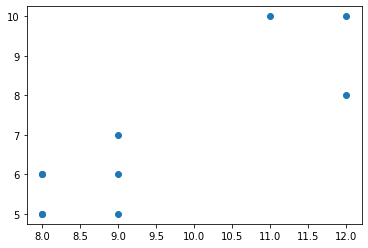

In [9]:
plt.plot(x, y, 'o', label='исходные данные')

### 2. Оценить функцию линейной регрессии Y по X. Пояснить, в чем смысл ее параметров.

In [10]:
est = sm.OLS(y, sm.add_constant(x)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     24.02
Date:                Mon, 30 May 2022   Prob (F-statistic):            0.00119
Time:                        19:33:05   Log-Likelihood:                -13.314
No. Observations:                  10   AIC:                             30.63
Df Residuals:                       8   BIC:                             31.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7541      1.976     -1.394      0.2

In [11]:
y_pred = est.params[0]+ est.params[1] * x 
see = (np.sum((y - (x*est.params[1] +  est.params[0]))**2)/est.df_resid)**0.5
print("Оценка коэфициента регрессии m^=", est.params[1])
print("Оценка сдвига b^=", est.params[0])
print("Коэффициент определения R^2=", est.rsquared)
print("Стандартная ошибка возмущений (SEE) s=", see)
print("Стандартные значения ошибок коэфициента s_m^=", est.bse['x'])
print("Стандартные значения ошибок сдвига s_b^=", est.bse['const'])
print("F-статистика", est.fvalue)
print("Степени свободы k2=", est.df_resid)

Оценка коэфициента регрессии m^= 1.0163934426229508
Оценка сдвига b^= -2.754098360655739
Коэффициент определения R^2= 0.7501951600312255
Стандартная ошибка возмущений (SEE) s= 1.024295039463168
Стандартные значения ошибок коэфициента s_m^= 0.20736246951923795
Стандартные значения ошибок сдвига s_b^= 1.9759369407631948
F-статистика 24.02499999999999
Степени свободы k2= 8.0


### 3. На поле корреляции показать линию регрессии.

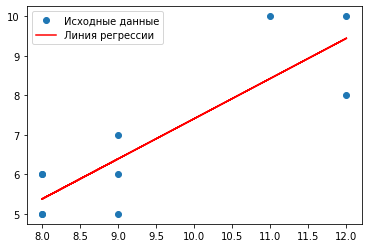

In [12]:
plt.plot(x, y, 'o', label='Исходные данные')
plt.plot(x, y_pred, 'r', label='Линия регрессии')
plt.legend()
plt.show()

### 4. Дать прогноз добычи угля на одного рабочего для двух открываемых шахт: со значениями толщины пласта 8 м и 15 м.

In [13]:
print("Прогноз при x=8, y^=", est.params[0] + est.params[1]*8)
print("Прогноз при x=15, y^=", est.params[0] + est.params[1]*15)

Прогноз при x=8, y^= 5.377049180327868
Прогноз при x=15, y^= 12.491803278688524


### 5. Определить абсолютное значение коэффициента корреляции между переменными Х и Y. Является ли связь между этими переменными тесной?

In [14]:
print("Коэффициент корреляции Пирсона r=", est.rsquared**0.5)

Коэффициент корреляции Пирсона r= 0.8661380721520244


|r| > 0.7, то связь между y и х тесная.

### 6. Определить остаточную, общую и регрессионную суммы квадратов. Пояснить их смысл. Найти коэффициент детерминации и пояснить его смысл.

In [15]:
#Вычислим Qe (SSE) — сумма квадратов оценок ошибок
sse = np.sum((y_pred - y)**2)
print("Qe = ", sse)

#Вычислим Qr (SSR) — остаточная сумма квадратов (SSR)
ssr = np.sum((y_pred - y.mean())**2)
print("Qr = ", ssr)

#calculate Q (SST)
sst = ssr + sse
print("Q = ", sst)


Qe =  8.393442622950822
Qr =  25.20655737704919
Q =  33.60000000000001


Так как Qr>Qe, то уравнение регрессии значимо.

In [16]:
print("R^2 = ",  ssr/sst)

R^2 =  0.7501951600312257


R^2 > 0.5, то уравнение регрессии значимо.

### 7. Используя F-статистику, оценить на уровне a=0,05 значимость полученного уравнения регрессии.

In [17]:
print("F-статистика ", est.fvalue)

F-статистика  24.02499999999999


In [18]:
f_val = f.ppf(q=1-.05, dfn=est.df_model, dfd=est.df_resid)
print("Критическое значение (порог) F-статистики: f(alfa=0,05;k1=p=1;k2=n-p-1=8)=", f_val)

Критическое значение (порог) F-статистики: f(alfa=0,05;k1=p=1;k2=n-p-1=8)= 5.317655071578714


Так как статистика F больше порога F>f(…),  то уравнение значимо.

### 8. По критерию Стьюдента проверить значимость коэффициента линейной регрессии.

In [19]:
T_val = est.params[1]/est.bse['x']
print("Статистика Стьюдента T= ", T_val)

Статистика Стьюдента T=  4.9015303732609885


In [20]:
t_val =abs(t.ppf(0.05/2, est.df_resid))
print("Порог Т-статистики t(alfa=0.05, k=k2=8)=", t_val)

Порог Т-статистики t(alfa=0.05, k=k2=8)= 2.306004135033371


Так как |T|>t(…), то коэффициент регрессии значим, то есть х существенно влияет на y.

Можно проверить, что F=T^2, f=t^2.

In [21]:
print('F=', est.fvalue, "T^2= ", T_val**2)

F= 24.02499999999999 T^2=  24.025000000000006


In [23]:
print('f=', f_val, "t^2= ", t_val**2)

f= 5.317655071578714 t^2=  5.317655070791005
